#### **Random Forest Regressor**


**Import Necessary Libraries**


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
sns.set(style="darkgrid")

**Load and Explore the Dataset**


In [119]:
data = pd.read_csv("Population_Vs_Profit.csv")

In [120]:
data.head()

,Population,Profit
0,5.5277,9.1302
1,5.8598,6.8233
2,7.4764,4.3483
3,17.5800,16.4850
4,6.4862,6.5987


In [121]:
data.shape

(105, 2)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  105 non-null    float64
 1   Profit      105 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [123]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,105.0,9.282954,4.758356,5.0269,5.7292,7.2259,11.7000,22.203
Profit,105.0,6.766483,6.235208,-2.6807,2.4406,5.1337,9.0551,24.147


**Separate Features and Target Variable**


In [124]:
X = data.drop("Profit", axis=1).values
y = data["Profit"].values.reshape(-1, 1)

**Visualize The Relationship Between Feature And Target**


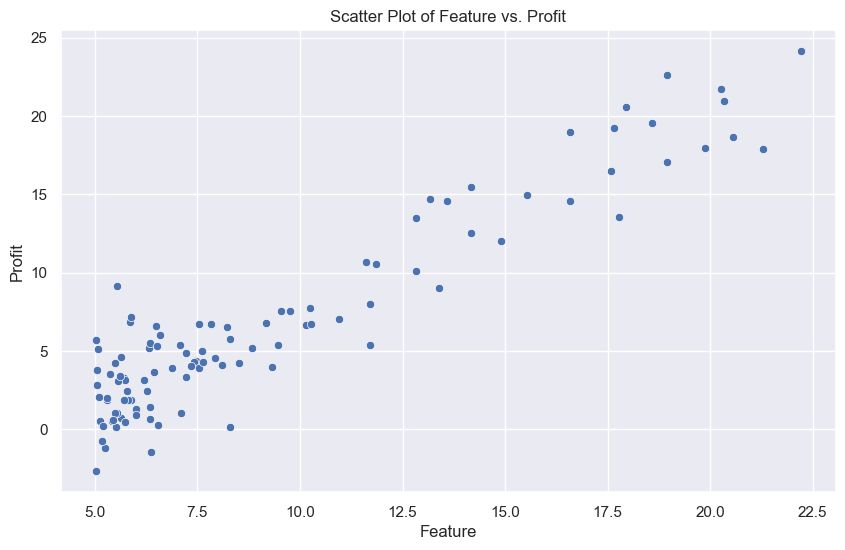

In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.ravel(), y=y.ravel())
plt.title("Scatter Plot of Feature vs. Profit")
plt.xlabel("Feature")
plt.ylabel("Profit")
plt.show()

**Train Random Forest Regressor Model**


In [126]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [128]:
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=42)
regressor.fit(X, y.ravel())

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

**Make Predictions and Evaluate the Model**


In [129]:
y_pred = regressor.predict(X)

In [130]:
from sklearn.metrics import r2_score

In [131]:
r2_score(y, y_pred)

0.9119108328394592

**Visualize the Results**


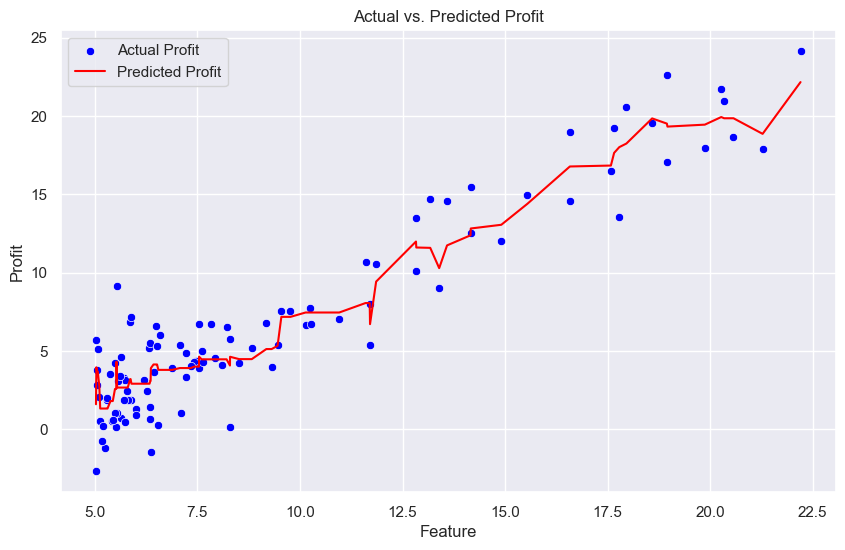

In [132]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=X.ravel(), y=y.ravel(), color="blue", label="Actual Profit")
sns.lineplot(x=X.ravel(), y=y_pred, color="red", label="Predicted Profit")

plt.title("Actual vs. Predicted Profit")
plt.xlabel("Feature")
plt.ylabel("Profit")
plt.show()